In [2]:
from Landscape import Landscape
from CoarseLandscape import CoarseLandscape
from BinaryLandscape import BinaryLandscape
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


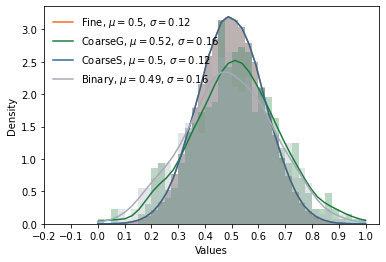

In [3]:
data_folder = r"E:\data\gst-0512\landscapes"
N = 9
K = 8
state_num = 4
norm = "MaxMin"
np.random.seed(1024)
landscape = Landscape(N=N, K=K, state_num=state_num, norm=norm)  # 4^9
coarse_landscape_G = CoarseLandscape(landscape=landscape, expertise_domain=np.random.choice(range(N), 9, replace=False),
                             expertise_representation=["A", "B"], norm=norm, collaborator="None")  # 2^6
coarse_landscape_S = CoarseLandscape(landscape=landscape, expertise_domain=np.random.choice(range(N), 9, replace=False),
                             expertise_representation=["0", "1", "2", "3"], norm=norm, collaborator="None")  # 4^3
binary_landscape = BinaryLandscape(N=N, K=K, K_within=None, K_between=None, norm=norm)  # 2^9
data = list(landscape.cache.values())
FC_data = []
for row in range(N):
    for column in range(4 ** (K+1)):
        FC_data.append(landscape.FC[row][column])
# print(len(FC_data))
# print(FC_data)
coarse_data_G = list(coarse_landscape_G.cache.values())
coarse_data_S = list(coarse_landscape_S.cache.values())
binary_data = list(binary_landscape.cache.values())
# The density exceed 1 because the length of x-axis is 1 (too small); the area below the density curve must be 1
bins = 40
alpha = 0.3
# Hist 1: Multi-State Landscape
# data = np.random.choice(data, size=2**9)  # to keep the same sample size
plt.hist(data, bins=bins, color=nature_orange, alpha=alpha, density=True)
kde1 = gaussian_kde(data)
x_values1 = np.linspace(min(data), max(data), bins)
pdf1 = kde1(x_values1)
plt.plot(x_values1, pdf1, '-', color=nature_orange,
         label='Fine, $\mu=${0}, $\sigma=${1}'.format(round(sum(data) / len(data), 2), round(float(np.std(data)), 2)))

# Hist 2: G Coarse Landscape
plt.hist(coarse_data_G, bins=bins, color=nature_green, alpha=alpha, density=True)
kde2 = gaussian_kde(coarse_data_G)
x_values2 = np.linspace(min(coarse_data_G), max(coarse_data_G), bins)
pdf2 = kde2(x_values2)
plt.plot(x_values2, pdf2, '-', color=nature_green,
         label='CoarseG, $\mu=${0}, $\sigma=${1}'.format(round(sum(coarse_data_G) / len(coarse_data_G), 2), round(float(np.std(coarse_data_G)), 2)))

# Hist 3: S Coarse Landscape
plt.hist(coarse_data_S, bins=bins, color=nature_blue, alpha=alpha, density=True)
kde3 = gaussian_kde(coarse_data_S)
x_values3 = np.linspace(min(coarse_data_S), max(coarse_data_S), bins)
pdf3 = kde3(x_values3)
plt.plot(x_values3, pdf3, '-', color=nature_blue,
         label='CoarseS, $\mu=${0}, $\sigma=${1}'.format(round(sum(coarse_data_S) / len(coarse_data_S), 2), round(float(np.std(coarse_data_S)), 2)))

# Hist 3: Binary Landscape
plt.hist(binary_data, bins=bins, alpha=alpha, color=deep_grey, density=True)
kde4 = gaussian_kde(binary_data)
x_values4 = np.linspace(min(binary_data), max(binary_data), bins)
pdf4 = kde4(x_values4)
plt.plot(x_values4, pdf4, '-', color=deep_grey,
         label='Binary, $\mu=${0}, $\sigma=${1}'.format(round(sum(binary_data) / len(binary_data), 2), round(float(np.std(binary_data)), 2)))

# Hist 4: Fitness Configuration
# plt.hist(FC_data, bins=bins, color=deep_grey, alpha=alpha, density=True)
# kde4 = gaussian_kde(FC_data)
# x_values4 = np.linspace(min(FC_data), max(FC_data), bins)
# pdf4 = kde4(x_values4)
# plt.plot(x_values4, pdf4, '-', color=deep_grey,
#          label="Fitness Configuration")

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.xticks(np.arange(-0.2, 1.1, 0.1))
# plt.title('Landscape Distribution')
plt.legend(frameon=False, fontsize=10, loc='upper left')
plt.savefig(data_folder + r"\{2}_N{0}_K{1}.png".format(N, K, norm), transparent=True, dpi=300)
# Show the plot
plt.show()
# plt.clf()
# this cannot be the evidence for landscape comparison, but for fitness comparability. Because high-dimension relative neighborhood information is removed in this distribution aggregation. This is for why we choose Max-Min, instead of Max normalization or None normalization.

In [21]:
# Estimating the probability density functions (PDFs)
pdf1 = gaussian_kde(data)
pdf2 = gaussian_kde(coarse_data_G)

# Creating a common support grid
x = np.linspace(min(min(data), min(coarse_data_G)), max(max(data), max(coarse_data_G)), num=100)

# Evaluating the PDFs on the common support grid
pdf1_vals = pdf1(x)
pdf2_vals = pdf2(x)

# Calculating the KL divergence
kl_divergence = kl_div(pdf1_vals, pdf2_vals).sum()

print(f"KL Divergence: {kl_divergence}")
# when two distributions are the same, KL divergence should be zero;
# The smaller KL divergence is, the more similar these two distributions are

KL Divergence: 7.92232520656058


In [ ]:
data_folder = r"E:\data\gst-0512\landscapes_max"
# K_list = [0, 1, 2, 3, 4, 5, 6, 7, 8]
K_list = [0]
expertise_domain_list = [18]
for K in K_list:
    index = 0
    fig, ax = plt.subplots()
    for expertise_domain in expertise_domain_list:
        index += 1
        bin_data_file = data_folder + r"\bin_cache_K_{0}_E_{1}".format(K, expertise_domain)
        data_file = data_folder + r"\cache_K_{0}_E_{1}".format(K, expertise_domain)
        cog_data_file = data_folder + r"\cog_cache_K_{0}_E_{1}".format(K, expertise_domain)
        with open(bin_data_file, "rb") as infile:
            bin_data = pickle.load(infile)
        with open(data_file, "rb") as infile:
            data = pickle.load(infile)
        with open(cog_data_file, "rb") as infile:
            cog_data = pickle.load(infile)
        plt.hist(bin_data, bins=40, color=nature_blue, alpha=0.3, density=True, label='Bin, K{0}'.format(K))
        kde_1 = gaussian_kde(bin_data)
        x_values_1 = np.linspace(min(bin_data), max(bin_data), 40)
        pdf_1 = kde_1(x_values_1)
        plt.plot(x_values_1, pdf_1, '-', color=nature_blue)

        plt.hist(data, bins=40, color=nature_orange, alpha=0.3, density=True, label='Multi, K{0}'.format(K))
        kde_2 = gaussian_kde(data)
        x_values_2 = np.linspace(min(data), max(data), 40)
        pdf_2 = kde_2(x_values_2)
        plt.plot(x_values_2, pdf_2, '-', color=nature_orange)

        plt.hist(cog_data, bins=40, color=nature_green, alpha=0.3, density=True, label='Cog, K{0}'.format(K))
        kde_3 = gaussian_kde(cog_data)
        x_values_3 = np.linspace(min(cog_data), max(cog_data), 40)
        pdf_3 = kde_3(x_values_3)
        plt.plot(x_values_3, pdf_3, '-', color=nature_green)
    # Add labels and legend
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('Landscape Distribution')
    plt.legend(frameon=False, prop=legend_properties)
    plt.savefig(data_folder + r"\landscape_distribution_K_{0}.png".format(K), transparent=True, dpi=300)
    plt.show()
    # plt.clf()

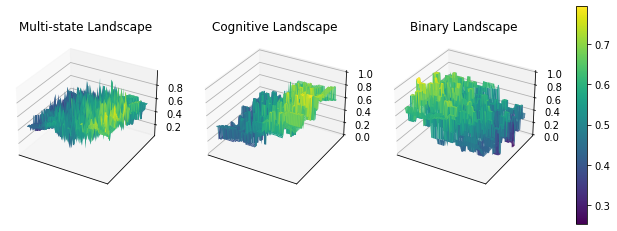

<Figure size 432x288 with 0 Axes>

In [23]:
# Landscape Visualization
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.decomposition import PCA

data_folder = r"E:\data\gst-0512\landscapes"
N = 9
K = 0
state_num = 4
norm = "MaxMin"
np.random.seed(1000)
landscape = Landscape(N=N, K=K, state_num=state_num, norm=norm)  # 4^9
coarse_landscape = CoarseLandscape(landscape=landscape, expertise_domain=list(range(N)),
                             expertise_representation=["A", "B"], norm=norm)  # 2^9
binary_landscape = BinaryLandscape(N=N, K=K, K_within=None, K_between=None, norm=norm)  # 2^9
multi_data = landscape.cache
cog_data = coarse_landscape.cache
bin_data = binary_landscape.cache

# Convert data dictionary to a 2D array (X) and corresponding fitness values (y)
multi_XY, cog_XY, bin_XY = [], [], []
multi_fitness, cog_fitness, bin_fitness = [], [], []
for key, value in multi_data.items():
    multi_XY.append(list(map(int, list(key))))
    multi_fitness.append(value)
multi_XY = np.array(multi_XY)
multi_fitness = np.array(multi_fitness)

for key, value in cog_data.items():
    new_key = ["0" if each == "A" else "1" for each in key ]
    cog_XY.append(list(map(int, list(new_key))))
    cog_fitness.append(value)
cog_XY = np.array(cog_XY)
cog_fitness = np.array(cog_fitness)

for key, value in bin_data.items():
    bin_XY.append(list(map(int, list(key))))
    bin_fitness.append(value)
bin_XY = np.array(bin_XY)
bin_fitness = np.array(bin_fitness)

# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
multi_XY_pca = pca.fit_transform(multi_XY)
cog_XY_pca = pca.fit_transform(cog_XY)
bin_XY_pca = pca.fit_transform(bin_XY)

# Create a meshgrid for the 2D space
multi_x = np.linspace(min(multi_XY_pca[:, 0]), max(multi_XY_pca[:, 0]), num=100)
multi_y = np.linspace(min(multi_XY_pca[:, 1]), max(multi_XY_pca[:, 1]), num=100)
multi_X_mesh, multi_Y_mesh = np.meshgrid(multi_x, multi_y)

cog_x = np.linspace(min(cog_XY_pca[:, 0]), max(cog_XY_pca[:, 0]), num=100)
cog_y = np.linspace(min(cog_XY_pca[:, 1]), max(cog_XY_pca[:, 1]), num=100)
cog_X_mesh, cog_Y_mesh = np.meshgrid(cog_x, cog_y)

bin_x = np.linspace(min(bin_XY_pca[:, 0]), max(bin_XY_pca[:, 0]), num=100)
bin_y = np.linspace(min(bin_XY_pca[:, 1]), max(bin_XY_pca[:, 1]), num=100)
bin_X_mesh, bin_Y_mesh = np.meshgrid(bin_x, bin_y)

# Interpolate the fitness values for the meshgrid points
multi_Z_mesh = np.zeros_like(multi_X_mesh)
for i in range(multi_X_mesh.shape[0]):
    for j in range(multi_X_mesh.shape[1]):
        point = np.array([multi_X_mesh[i, j], multi_Y_mesh[i, j]])
        idx = np.argmin(np.sum((multi_XY_pca - point) ** 2, axis=1))
        multi_Z_mesh[i, j] = multi_fitness[idx]
cog_Z_mesh = np.zeros_like(cog_X_mesh)
for i in range(cog_X_mesh.shape[0]):
    for j in range(cog_X_mesh.shape[1]):
        point = np.array([cog_X_mesh[i, j], cog_Y_mesh[i, j]])
        idx = np.argmin(np.sum((cog_XY_pca - point) ** 2, axis=1))
        cog_Z_mesh[i, j] = cog_fitness[idx]
bin_Z_mesh = np.zeros_like(bin_X_mesh)
for i in range(bin_X_mesh.shape[0]):
    for j in range(bin_X_mesh.shape[1]):
        point = np.array([bin_X_mesh[i, j], bin_Y_mesh[i, j]])
        idx = np.argmin(np.sum((bin_XY_pca - point) ** 2, axis=1))
        bin_Z_mesh[i, j] = bin_fitness[idx]

# Create the figure and subplots
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
surface_1 = ax1.plot_surface(multi_X_mesh, multi_Y_mesh, multi_Z_mesh, cmap='viridis')

ax2 = fig.add_subplot(132, projection='3d')
surface_2 = ax2.plot_surface(cog_X_mesh, cog_Y_mesh, cog_Z_mesh, cmap='viridis')

ax3 = fig.add_subplot(133, projection='3d')
surface_3 = ax3.plot_surface(bin_X_mesh, bin_Y_mesh, bin_Z_mesh, cmap='viridis')
# Set labels and title
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Multi-state Landscape')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Cognitive Landscape')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('Binary Landscape')

# Add a color bar on the right side
cbar = fig.colorbar(ax1.plot_surface(multi_X_mesh, multi_Y_mesh, multi_Z_mesh, cmap='viridis'), ax=[ax1, ax2, ax3], pad=0.05)

# Show the plot
plt.show()

plt.savefig(data_folder + r"\landscape_visualization.png", transparent=True, dpi=300)
# Show the plot
plt.show()

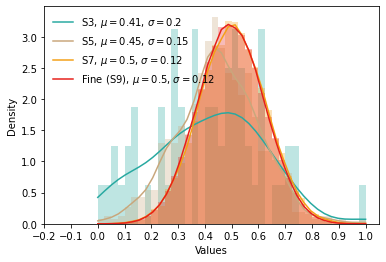

In [12]:
# Specialist Rewarding Environment across Knowledge
data_folder = r"E:\data\gst-0512\landscapes"
N = 9
K = 8
state_num = 4
norm = "MaxMin"
np.random.seed(1024)
landscape = Landscape(N=N, K=K, state_num=state_num, norm=norm)  # 4^9
# coarse_landscape_S_1 = CoarseLandscape(landscape=landscape, expertise_domain=np.random.choice(range(N), 1, replace=False),
#                              expertise_representation=["0", "1", "2", "3"], norm=norm, collaborator="None")
coarse_landscape_S_2 = CoarseLandscape(landscape=landscape, expertise_domain=np.random.choice(range(N), 3, replace=False),
                             expertise_representation=["0", "1", "2", "3"], norm=norm, collaborator="None")  # 4^3
coarse_landscape_S_3 = CoarseLandscape(landscape=landscape, expertise_domain=np.random.choice(range(N), 5, replace=False),
                             expertise_representation=["0", "1", "2", "3"], norm=norm, collaborator="None")  # 4^3
coarse_landscape_S_4 = CoarseLandscape(landscape=landscape, expertise_domain=np.random.choice(range(N), 7, replace=False),
                             expertise_representation=["0", "1", "2", "3"], norm=norm, collaborator="None")  # 4^3
# binary_landscape = BinaryLandscape(N=N, K=K, K_within=None, K_between=None, norm=norm)  # 2^9
data = list(landscape.cache.values())
# coarse_data_S_1 = list(coarse_landscape_S_1.cache.values())
coarse_data_S_2 = list(coarse_landscape_S_2.cache.values())
coarse_data_S_3 = list(coarse_landscape_S_3.cache.values())
coarse_data_S_4 = list(coarse_landscape_S_4.cache.values())
# The density exceed 1 because the length of x-axis is 1 (too small); the area below the density curve must be 1
bins = 40
alpha = 0.3

# Hist 2: S Coarse Landscape
# plt.hist(coarse_data_S_1, bins=bins, color=morandi_blue, alpha=alpha, density=True)
# kde2 = gaussian_kde(coarse_data_S_1)
# x_values2 = np.linspace(min(coarse_data_S_1), max(coarse_data_S_1), bins)
# pdf2 = kde2(x_values2)
# plt.plot(x_values2, pdf2, '-', color=morandi_blue,
#          label='S1, $\mu=${0}, $\sigma=${1}'.format(round(sum(coarse_data_S_1) / len(coarse_data_S_1), 2), round(float(np.std(coarse_data_S_1)), 2)))

# Hist 3: S Coarse Landscape
plt.hist(coarse_data_S_2, bins=bins, color=morandi_green, alpha=alpha, density=True)
kde3 = gaussian_kde(coarse_data_S_2)
x_values3 = np.linspace(min(coarse_data_S_2), max(coarse_data_S_2), bins)
pdf3 = kde3(x_values3)
plt.plot(x_values3, pdf3, '-', color=morandi_green,
         label='S3, $\mu=${0}, $\sigma=${1}'.format(round(sum(coarse_data_S_2) / len(coarse_data_S_2), 2), round(float(np.std(coarse_data_S_2)), 2)))

# Hist 3: S Coarse Landscape
plt.hist(coarse_data_S_3, bins=bins, color=morandi_yellow, alpha=alpha, density=True)
kde3 = gaussian_kde(coarse_data_S_3)
x_values3 = np.linspace(min(coarse_data_S_3), max(coarse_data_S_3), bins)
pdf3 = kde3(x_values3)
plt.plot(x_values3, pdf3, '-', color=morandi_yellow,
         label='S5, $\mu=${0}, $\sigma=${1}'.format(round(sum(coarse_data_S_3) / len(coarse_data_S_3), 2), round(float(np.std(coarse_data_S_3)), 2)))

plt.hist(coarse_data_S_4, bins=bins, color=morandi_orange, alpha=alpha, density=True)
kde4 = gaussian_kde(coarse_data_S_4)
x_values4 = np.linspace(min(coarse_data_S_4), max(coarse_data_S_4), bins)
pdf4 = kde4(x_values4)
plt.plot(x_values4, pdf4, '-', color=morandi_orange,
         label='S7, $\mu=${0}, $\sigma=${1}'.format(round(sum(coarse_data_S_4) / len(coarse_data_S_4), 2), round(float(np.std(coarse_data_S_4)), 2)))

# Hist 1: Multi-State Landscape
# data = np.random.choice(data, size=2**9)  # to keep the same sample size
plt.hist(data, bins=bins, color=morandi_red, alpha=alpha, density=True)
kde1 = gaussian_kde(data)
x_values1 = np.linspace(min(data), max(data), bins)
pdf1 = kde1(x_values1)
plt.plot(x_values1, pdf1, '-', color=morandi_red,
         label='Fine (S9), $\mu=${0}, $\sigma=${1}'.format(round(sum(data) / len(data), 2), round(float(np.std(data)), 2)))


# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.xticks(np.arange(-0.2, 1.1, 0.1))
# plt.title('Landscape Distribution')
plt.legend(frameon=False, fontsize=10, loc='upper left')
plt.savefig(data_folder + r"\Different_S_{2}_N{0}_K{1}.png".format(N, K, norm), transparent=True, dpi=300)
# Show the plot
plt.show()
# plt.clf()

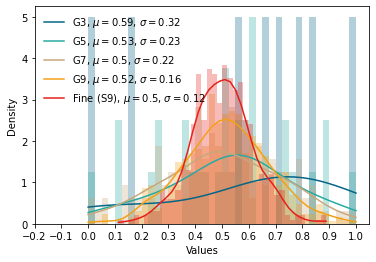

In [18]:
# Generalist Rewarding Environment across Knowledge
data_folder = r"E:\data\gst-0512\landscapes"
N = 9
K = 8
state_num = 4
norm = "MaxMin"
norm_2 = "None"
np.random.seed(1024)
landscape = Landscape(N=N, K=K, state_num=state_num, norm=norm)  # 4^9
coarse_landscape_G_1 = CoarseLandscape(landscape=landscape, expertise_domain=np.random.choice(range(N), 3, replace=False),
                             expertise_representation=["A", "B"], norm=norm, collaborator="None")
coarse_landscape_G_2 = CoarseLandscape(landscape=landscape, expertise_domain=np.random.choice(range(N), 5, replace=False),
                             expertise_representation=["A", "B"], norm=norm, collaborator="None")
coarse_landscape_G_3 = CoarseLandscape(landscape=landscape, expertise_domain=np.random.choice(range(N), 7, replace=False),
                             expertise_representation=["A", "B"], norm=norm, collaborator="None")
coarse_landscape_G_4 = CoarseLandscape(landscape=landscape, expertise_domain=np.random.choice(range(N), 9, replace=False),
                             expertise_representation=["A", "B"], norm=norm, collaborator="None")
# binary_landscape = BinaryLandscape(N=N, K=K, K_within=None, K_between=None, norm=norm)  # 2^9
data = list(landscape.cache.values())
coarse_data_G_1 = list(coarse_landscape_G_1.cache.values())
coarse_data_G_2 = list(coarse_landscape_G_2.cache.values())
coarse_data_G_3 = list(coarse_landscape_G_3.cache.values())
coarse_data_G_4 = list(coarse_landscape_G_4.cache.values())
# The density exceed 1 because the length of x-axis is 1 (too small); the area below the density curve must be 1
bins = 40
alpha = 0.3

# Hist 2: S Coarse Landscape
plt.hist(coarse_data_G_1, bins=bins, color=morandi_blue, alpha=alpha, density=True)
kde2 = gaussian_kde(coarse_data_G_1)
x_values2 = np.linspace(min(coarse_data_G_1), max(coarse_data_G_1), bins)
pdf2 = kde2(x_values2)
plt.plot(x_values2, pdf2, '-', color=morandi_blue,
         label='G3, $\mu=${0}, $\sigma=${1}'.format(round(sum(coarse_data_G_1) / len(coarse_data_G_1), 2), round(float(np.std(coarse_data_G_1)), 2)))

# Hist 3: S Coarse Landscape
plt.hist(coarse_data_G_2, bins=bins, color=morandi_green, alpha=alpha, density=True)
kde3 = gaussian_kde(coarse_data_G_2)
x_values3 = np.linspace(min(coarse_data_G_2), max(coarse_data_G_2), bins)
pdf3 = kde3(x_values3)
plt.plot(x_values3, pdf3, '-', color=morandi_green,
         label='G5, $\mu=${0}, $\sigma=${1}'.format(round(sum(coarse_data_G_2) / len(coarse_data_G_2), 2), round(float(np.std(coarse_data_G_2)), 2)))

# Hist 3: S Coarse Landscape
plt.hist(coarse_data_G_3, bins=bins, color=morandi_yellow, alpha=alpha, density=True)
kde3 = gaussian_kde(coarse_data_G_3)
x_values3 = np.linspace(min(coarse_data_G_3), max(coarse_data_G_3), bins)
pdf3 = kde3(x_values3)
plt.plot(x_values3, pdf3, '-', color=morandi_yellow,
         label='G7, $\mu=${0}, $\sigma=${1}'.format(round(sum(coarse_data_G_3) / len(coarse_data_G_3), 2), round(float(np.std(coarse_data_G_3)), 2)))

plt.hist(coarse_data_G_4, bins=bins, color=morandi_orange, alpha=alpha, density=True)
kde4 = gaussian_kde(coarse_data_G_4)
x_values4 = np.linspace(min(coarse_data_G_4), max(coarse_data_G_4), bins)
pdf4 = kde4(x_values4)
plt.plot(x_values4, pdf4, '-', color=morandi_orange,
         label='G9, $\mu=${0}, $\sigma=${1}'.format(round(sum(coarse_data_G_4) / len(coarse_data_G_4), 2), round(float(np.std(coarse_data_G_4)), 2)))

# Hist 1: Multi-State Landscape
data = np.random.choice(data, size=2**9)  # to keep the same sample size
plt.hist(data, bins=bins, color=morandi_red, alpha=alpha, density=True)
kde1 = gaussian_kde(data)
x_values1 = np.linspace(min(data), max(data), bins)
pdf1 = kde1(x_values1)
plt.plot(x_values1, pdf1, '-', color=morandi_red,
         label='Fine (S9), $\mu=${0}, $\sigma=${1}'.format(round(sum(data) / len(data), 2), round(float(np.std(data)), 2)))


# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.xticks(np.arange(-0.2, 1.1, 0.1))
# plt.title('Landscape Distribution')
plt.legend(frameon=False, fontsize=10, loc='upper left')
plt.savefig(data_folder + r"\Different_G_{2}_N{0}_K{1}.png".format(N, K, norm), transparent=True, dpi=300)
# Show the plot
plt.show()
# plt.clf()